# Phase 3 Data Science Training Notebook

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [32]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


file = r'.\\cifar-10-batches-py\\data_batch_1'
data_batch_1 = unpickle(file)


In [33]:
# code to check the type and format of data we're dealing with
type(data_batch_1)
len(data_batch_1)
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [34]:
# we can see that the images within the data_batch is represented as a 2d list
data_batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [35]:
# there are a total of 10000 lists in this 2d list, where each list contains 3072 elements
data_batch_1[b'data'].shape

(10000, 3072)

# Reshape the image

In [36]:
# reshaping a single image
image = data_batch_1[b'data'][0]
image = image.reshape(3,32,32)
image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [37]:
# transposing the same single image
image = image.transpose(1,2,0)
print(image.shape)
image


(32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

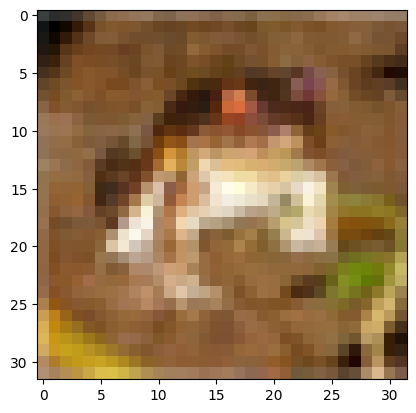

In [38]:
plt.imshow(image)

(10000, 32, 32, 3)


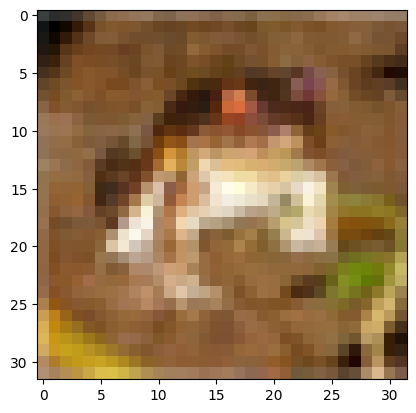

In [39]:
# reshaping/transposing the entire set of images
data = data_batch_1[b'data']
data = data.reshape(len(data), 3, 32, 32,).transpose(0, 2, 3, 1)
print(data.shape)

# display first image to make sure its working
plt.imshow(data[0])

# Rendering 5 images from each label

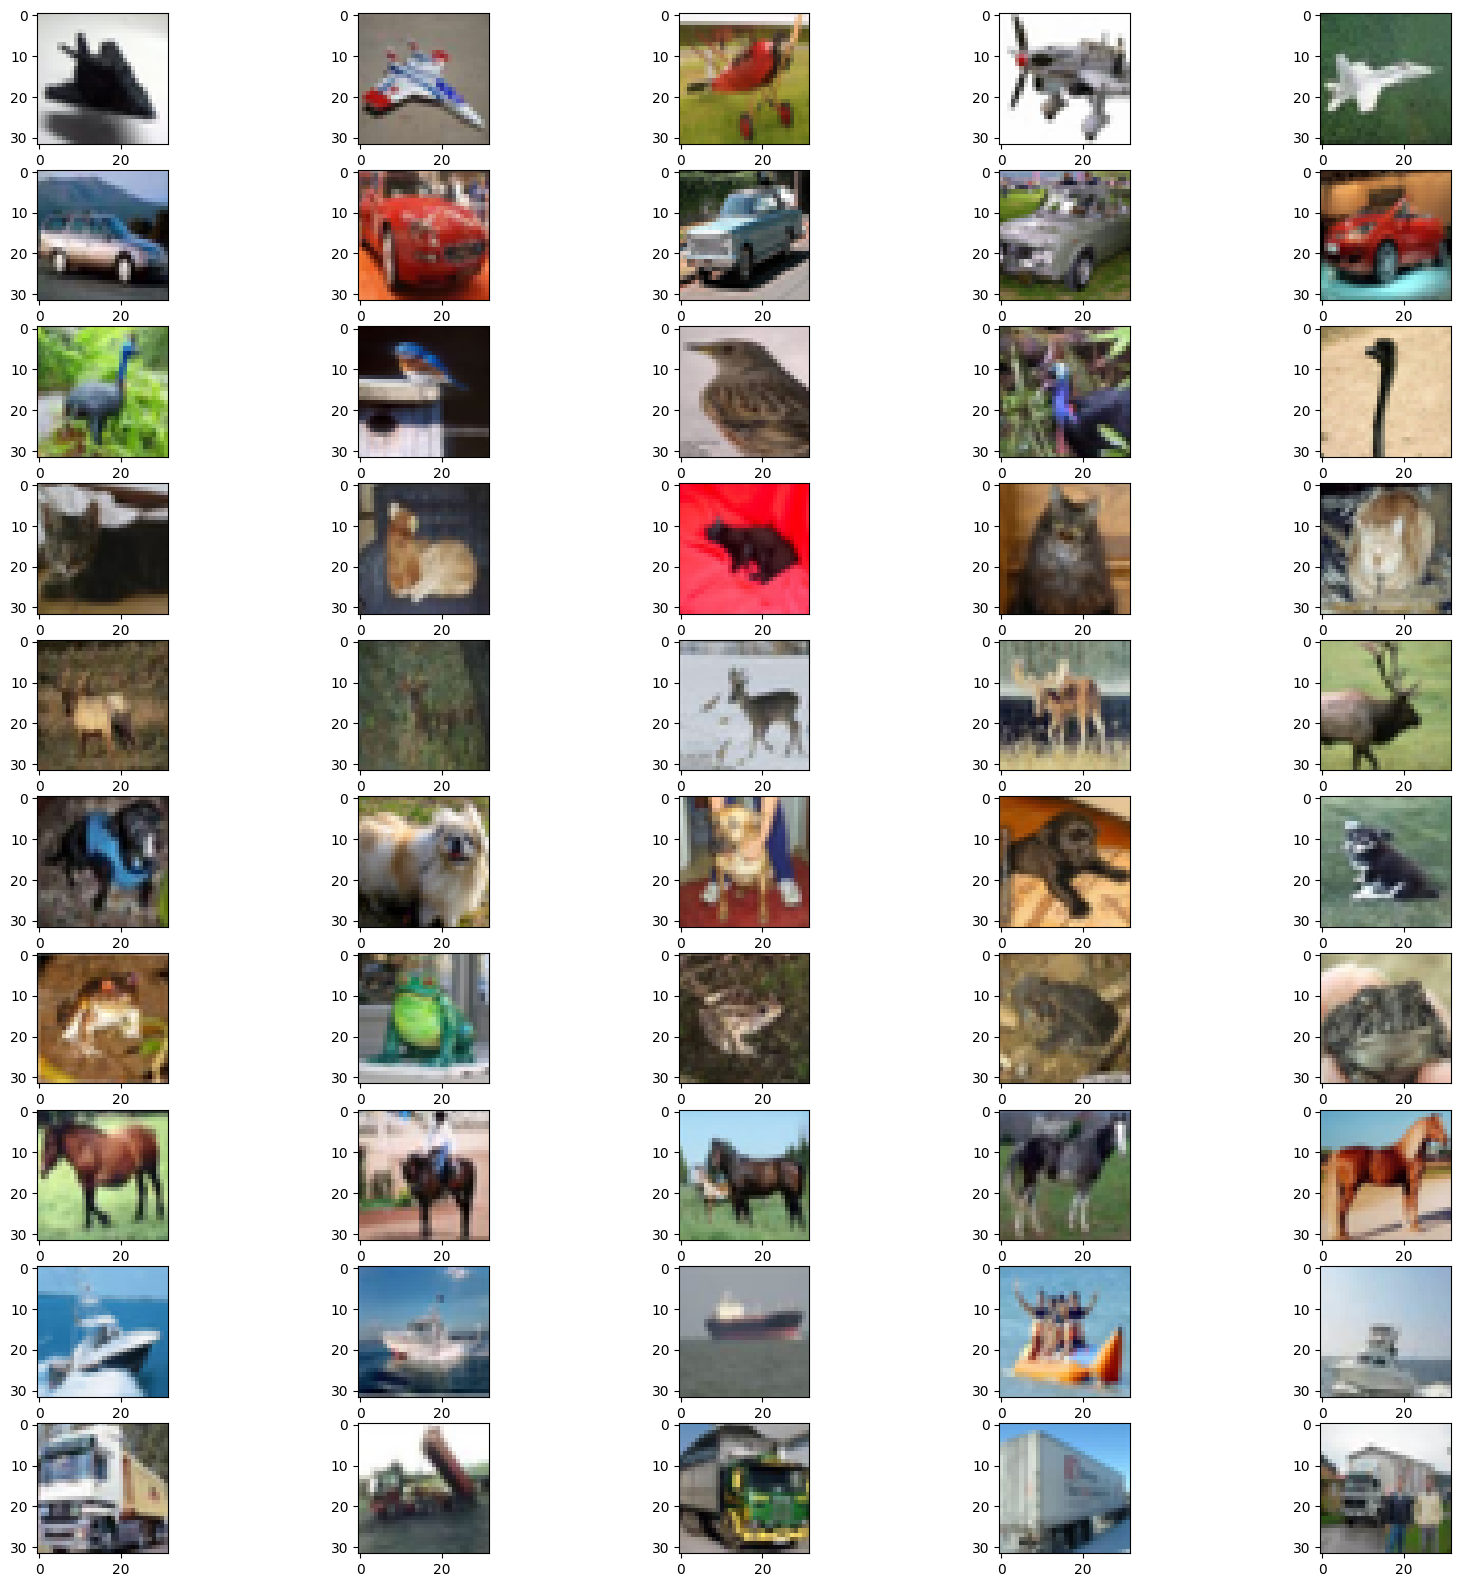

In [40]:
labels = data_batch_1[b'labels']
label_index_lists = [[],[],[],[],[],[],[],[],[],[]]

# for each label, store the first 5 indices of images corresponding to that label in a list
label_number = 0
for label_index_list in label_index_lists:
    for i in range(len(labels)):
        if labels[i] == label_number and len(label_index_list) < 5:
            label_index_list.append(i)
    label_number += 1

# plot the 5 images for each label
columns = 5
rows = 10
pos = 1
fig = plt.figure(figsize=(20,20))
for i  in range(10):
    for j in range(5):
        fig.add_subplot(rows, columns, pos)
        plt.imshow(data[label_index_lists[i][j]])
        pos += 1
  
plt.show()

# Data Processing

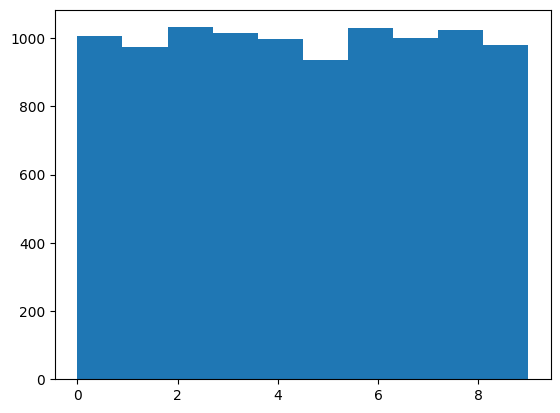

In [41]:
data_plot = data_batch_1[b'labels']
plt.hist(data_plot, bins=10)
plt.show()

# There does not seem to be a data imbalance between the images

In [42]:
train_x = np.random.randint(0,255,size=(10000,3,32,32))
train_y = np.random.randint(0,255,size=(10000))

test_x = np.random.randint(0,255,size=(1000,3,32,32))
test_y = np.random.randint(0,255,size=(1000))

# Data Modelling

In [43]:
import tensorflow as tf
from tensorflow.python.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

In [44]:
def generateModel():
    """
    Make a Keras Sequential Model.
    Feel free to change the layout of the layers.

    Read more about keras here: https://keras.io/api/
    Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
    """
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(3,32,32))) # Input layer.

    model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

    model.add(layers.Dense(40, activation="relu")) # Example Hidden Layer 1. Has 40 Nodes.
    model.add(layers.Dense(25, activation="sigmoid")) # Example Hidden Layer 2. Has 25 Nodes.
    model.add(layers.Dense(15, activation="tanh")) # Example Hidden Layer 3. Has 15 Nodes.

    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

    model.compile(
        optimizer=optimizers.SGD(learning_rate=0.01),
        loss=losses.MeanAbsoluteError(),
        metrics=['accuracy']
    )

    return model

In [45]:
model = generateModel()

log_dir = "output/logs/" + datetime.now().strftime("%Y-%m-%d-%H:%M:%S")

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=50000,
    batch_size=1000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    # verbose=0 # Uncomment this line to reduce the printing on console.
)

AttributeError: module 'tensorflow.python.keras.layers' has no attribute 'Rescaling'

In [ ]:
model.save('output/my_model')